In [1]:
import sys
import os


sys.path.append(os.path.abspath(".."))
import xarray as xr
import numpy as np

from scripts.read_dataset import read_precipitation_dataset

ds_ens = read_precipitation_dataset("../data/total_precipitation_20171001_01.nc")

print(ds_ens)

<xarray.Dataset> Size: 58MB
Dimensions:    (lat: 492, lon: 594, time: 24)
Coordinates:
  * time       (time) datetime64[ns] 192B 2017-10-01 ... 2017-10-01T23:00:00
Dimensions without coordinates: lat, lon
Data variables:
    latitude   (lat, lon) float32 1MB ...
    longitude  (lat, lon) float32 1MB ...
    precip     (time, lat, lon) float64 56MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0


In [2]:
ds_ref_sp = read_precipitation_dataset("../data/SPARTACUS2-DAILY_RR_2017.nc")

print(ds_ref_sp)

<xarray.Dataset> Size: 563MB
Dimensions:                  (time: 365, y: 329, x: 584)
Coordinates:
    lambert_conformal_conic  float64 8B ...
    lat                      (y, x) float32 769kB ...
    lon                      (y, x) float32 769kB ...
  * time                     (time) datetime64[ns] 3kB 2017-01-01 ... 2017-12-31
  * x                        (x) int32 2kB 112500 113500 ... 694500 695500
  * y                        (y) int32 1kB 258500 259500 ... 585500 586500
Data variables:
    precip                   (time, y, x) float64 561MB nan nan nan ... nan nan
Attributes: (12/14)
    Conventions:         CF-1.7
    author:              GeoSphere Austria (kontakt@geosphere.at)
    comment:             No additional comments
    crs:                 EPSG:3416
    freq:                1D
    grid_mapping:        lambert_conformal_conic
    ...                  ...
    name:                spartacus-daily v2.1
    references:          temperature - doi:10.1007/s00704-015-1411-4,

In [3]:
ds_ref_inca = read_precipitation_dataset("../data/INCAL_HOURLY_RR_201701.nc")

print(ds_ref_inca)

<xarray.Dataset> Size: 2GB
Dimensions:                  (time: 744, y: 401, x: 701)
Coordinates:
    lambert_conformal_conic  float64 8B ...
    lat                      (y, x) float32 1MB ...
    lon                      (y, x) float32 1MB ...
  * time                     (time) datetime64[ns] 6kB 2017-01-01 ... 2017-01...
  * x                        (x) int32 3kB 20000 21000 22000 ... 719000 720000
  * y                        (y) int32 2kB 220000 221000 ... 619000 620000
Data variables:
    precip                   (time, y, x) float64 2GB 0.0 0.0 0.0 ... 0.0 0.0
Attributes: (12/14)
    Conventions:         CF-1.7
    author:              Alexander Kann (alexander.kann@zamg.ac.at), Benedikt...
    comment:             No additional comments
    crs:                 EPSG:31287
    freq:                1H
    grid_mapping:        lambert_conformal_conic
    ...                  ...
    name:                incal-hourly
    references:          https://www.zamg.ac.at/cms/de/forschung/

In [31]:
#from scripts.subset_consistently import subset_dataset_latlon, subset_multiple_datasets

lat_range = (46.0, 47.0)
lon_range = (12.0, 13.5)

    # 3) Define a time range that overlaps for all (if you want)
start_time = "2017-01-01T12:00:00"
end_time = "2017-01-01T23:00:00"  # full year 2017



In [18]:
#ds_ens_sub = ds_ens.isel(time='2017-10-01T12:00:00')

print(ds_ens.dims['time'])

24


/tmp/ipykernel_3939213/3565904109.py:3: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  print(ds_ens.dims['time'])


In [22]:
ds_ens_sub = ds_ens.sel(time=slice("2017-10-01T12:00:00", "2017-10-01T23:00:00"))

In [23]:
ds_ens_sub

<xarray.Dataset> Size: 30MB
Dimensions:    (lat: 492, lon: 594, time: 12)
Coordinates:
  * time       (time) datetime64[ns] 96B 2017-10-01T12:00:00 ... 2017-10-01T2...
Dimensions without coordinates: lat, lon
Data variables:
    latitude   (lat, lon) float32 1MB ...
    longitude  (lat, lon) float32 1MB ...
    precip     (time, lat, lon) float64 28MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [34]:
print(ds_ref_inca_sub.coords['lat'].values)

[[45.77222  45.772785 45.77335  ... 45.80471  45.804237 45.803764]
 [45.781197 45.781765 45.782326 ... 45.813694 45.81322  45.812748]
 [45.790176 45.79074  45.791306 ... 45.822678 45.822205 45.82173 ]
 ...
 [49.34498  49.345585 49.346188 ... 49.379734 49.379227 49.37872 ]
 [49.353947 49.354553 49.355156 ... 49.38871  49.388203 49.387695]
 [49.36292  49.36352  49.364124 ... 49.397686 49.39718  49.39667 ]]


In [36]:
print(ds_ref_inca_sub.coords['lon'].values)

[[ 8.444501  8.457331  8.470161 ... 17.424992 17.437836 17.45068 ]
 [ 8.443692  8.456524  8.469357 ... 17.425667 17.438515 17.45136 ]
 [ 8.442883  8.455717  8.468552 ... 17.426344 17.439194 17.452042]
 ...
 [ 8.099987  8.113715  8.127444 ... 17.713217 17.726963 17.74071 ]
 [ 8.099061  8.112791  8.126522 ... 17.713991 17.727741 17.74149 ]
 [ 8.098134  8.111867  8.1256   ... 17.714767 17.72852  17.74227 ]]


In [38]:
ds_ref_inca_subset = ds_ref_inca_sub.where((ds_ref_inca_sub.lat > 46)&(ds_ref_inca_sub.lat < 48)&(ds_ref_inca_sub.lon > 10)&(ds_ref_inca_sub.lon < 13), drop=True)

print(ds_ref_inca_subset)

<xarray.Dataset> Size: 6MB
Dimensions:                  (time: 12, y: 227, x: 234)
Coordinates:
    lambert_conformal_conic  float64 8B nan
    lat                      (y, x) float32 212kB 45.96 45.96 ... 48.04 48.04
    lon                      (y, x) float32 212kB 10.0 10.02 ... 12.98 13.0
  * time                     (time) datetime64[ns] 96B 2017-01-01T12:00:00 .....
  * x                        (x) int32 936B 142000 143000 ... 374000 375000
  * y                        (y) int32 908B 234000 235000 ... 459000 460000
Data variables:
    precip                   (time, y, x) float64 5MB nan nan nan ... nan nan
Attributes: (12/14)
    Conventions:         CF-1.7
    author:              Alexander Kann (alexander.kann@zamg.ac.at), Benedikt...
    comment:             No additional comments
    crs:                 EPSG:31287
    freq:                1H
    grid_mapping:        lambert_conformal_conic
    ...                  ...
    name:                incal-hourly
    references:   

In [41]:
print(ds_ens_sub)

<xarray.Dataset> Size: 30MB
Dimensions:    (lat: 492, lon: 594, time: 12)
Coordinates:
  * time       (time) datetime64[ns] 96B 2017-10-01T12:00:00 ... 2017-10-01T2...
Dimensions without coordinates: lat, lon
Data variables:
    latitude   (lat, lon) float32 1MB ...
    longitude  (lat, lon) float32 1MB ...
    precip     (time, lat, lon) float64 28MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0


In [44]:
#ds_ens_sub.sel(lat=slice(46, 48), lon=slice(10, 13), method="nearest")

print(ds_ens_sub.latitude.values)

[[42.981 42.981 42.981 ... 42.981 42.981 42.981]
 [42.999 42.999 42.999 ... 42.999 42.999 42.999]
 [43.017 43.017 43.017 ... 43.017 43.017 43.017]
 ...
 [51.783 51.783 51.783 ... 51.783 51.783 51.783]
 [51.801 51.801 51.801 ... 51.801 51.801 51.801]
 [51.819 51.819 51.819 ... 51.819 51.819 51.819]]


In [45]:
ds_ens_subset = ds_ens_sub.where((ds_ens_sub.latitude > 46)&(ds_ens_sub.latitude < 48)&(ds_ens_sub.longitude > 10)&(ds_ens_sub.longitude < 13), drop=True)

print(ds_ens_subset)

<xarray.Dataset> Size: 1MB
Dimensions:    (lat: 111, lon: 107, time: 12)
Coordinates:
  * time       (time) datetime64[ns] 96B 2017-10-01T12:00:00 ... 2017-10-01T2...
Dimensions without coordinates: lat, lon
Data variables:
    latitude   (lat, lon) float32 48kB 46.01 46.01 46.01 ... 47.99 47.99 47.99
    longitude  (lat, lon) float32 48kB 10.01 10.03 10.06 ... 12.92 12.95 12.97
    precip     (time, lat, lon) float64 1MB 0.3711 0.3335 ... 0.0004883 0.0


In [46]:
ds_ref_sp_sub = ds_ref_sp.sel(time=slice("2017-10-01", "2017-10-03")).where((ds_ref_sp.lat > 46)&(ds_ref_sp.lat < 48)&(ds_ref_sp.lon > 10)&(ds_ref_sp.lon < 13), drop=True)

print(ds_ref_sp_sub)

<xarray.Dataset> Size: 2MB
Dimensions:                  (time: 3, y: 203, x: 232)
Coordinates:
    lambert_conformal_conic  float64 8B nan
    lat                      (y, x) float32 188kB 46.18 46.18 ... 48.04 48.04
    lon                      (y, x) float32 188kB 10.01 10.02 ... 12.98 12.99
  * time                     (time) datetime64[ns] 24B 2017-10-01 ... 2017-10-03
  * x                        (x) int32 928B 143500 144500 ... 373500 374500
  * y                        (y) int32 812B 258500 259500 ... 459500 460500
Data variables:
    precip                   (time, y, x) float64 1MB nan nan nan ... nan nan
Attributes: (12/14)
    Conventions:         CF-1.7
    author:              GeoSphere Austria (kontakt@geosphere.at)
    comment:             No additional comments
    crs:                 EPSG:3416
    freq:                1D
    grid_mapping:        lambert_conformal_conic
    ...                  ...
    name:                spartacus-daily v2.1
    references:          

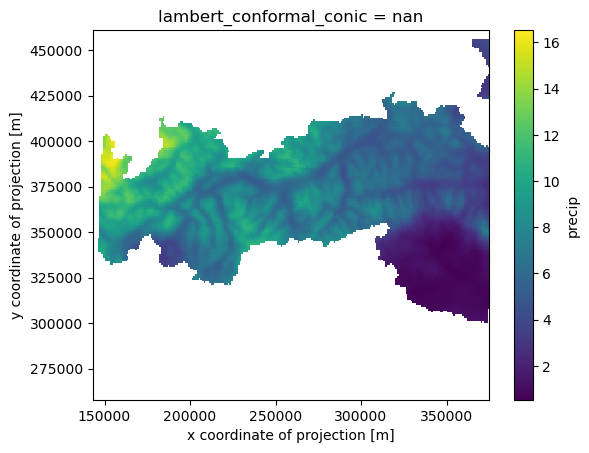

In [48]:
ds_ref_sp_sub.precip.mean(dim='time').plot()

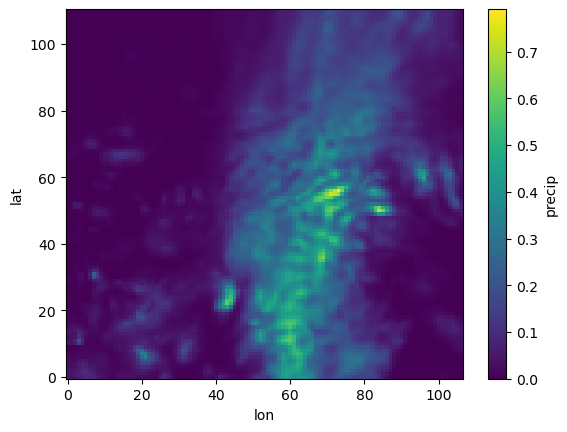

In [49]:
ds_ens_subset.precip.mean(dim='time').plot()

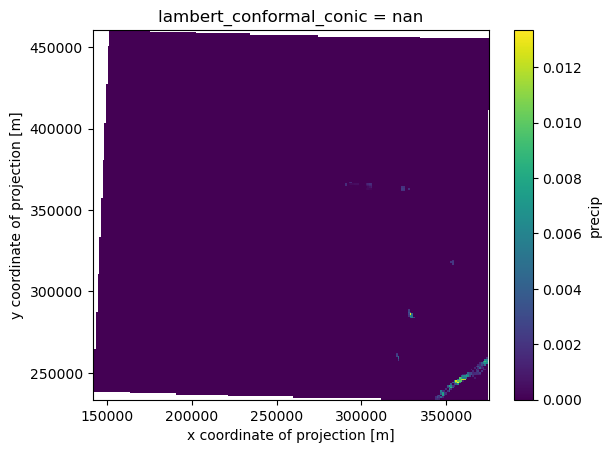

In [50]:
ds_ref_inca_subset.precip.mean(dim='time').plot()

In [51]:
diff = ds_ref_inca_subset.precip.mean(dim='time') - ds_ens_subset.precip.mean(dim='time')

print(diff)

<xarray.DataArray 'precip' (y: 227, x: 234, lat: 111, lon: 107)> Size: 5GB
array([[[[        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         ...,
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan]],

        [[        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
          

In [67]:
import xarray as xr

# --- Step 1: Extract 1D coordinates from the ensemble dataset ---
lat_1d = ds_ens_subset.latitude[:, 0].data   # each row is constant in latitude
lon_1d = ds_ens_subset.longitude[0, :].data   # each column is constant in longitude

# --- Step 2: Assign these as coordinates (and drop the original variables) ---
ds1 = ds_ens_subset.assign_coords(
    lat_coord=("lat", lat_1d),
    lon_coord=("lon", lon_1d)
).drop_vars(["latitude", "longitude"])

# (Optionally, compute the time-mean of precip now or later)
ds1_mean = ds1.precip.mean(dim="time")


print(ds1_mean)

<xarray.DataArray 'precip' (lat: 111, lon: 107)> Size: 95kB
array([[0.04148356, 0.0384318 , 0.04882812, ..., 0.        , 0.        ,
        0.        ],
       [0.04748535, 0.04288737, 0.05303955, ..., 0.        , 0.        ,
        0.        ],
       [0.04459635, 0.037618  , 0.04547119, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.05369059, 0.03550212,
        0.02115885],
       [0.        , 0.        , 0.        , ..., 0.05847168, 0.03957113,
        0.02237956],
       [0.        , 0.        , 0.        , ..., 0.06199137, 0.04243978,
        0.02437337]], shape=(111, 107))
Coordinates:
    lat_coord  (lat) float32 444B 46.01 46.02 46.04 46.06 ... 47.95 47.97 47.99
    lon_coord  (lon) float32 428B 10.01 10.03 10.06 10.09 ... 12.92 12.95 12.97
Dimensions without coordinates: lat, lon


In [58]:
# --- Step 3: Prepare the reference dataset ---
# Extract 1D coordinates (if applicable)
lat_ref = ds_ref_inca_subset.lat[:, 0].data
lon_ref = ds_ref_inca_subset.lon[0, :].data

print(lat_ref)

[45.956055 45.965046 45.974033 45.98302  45.99201  46.001    46.009987
 46.018974 46.02796  46.036953 46.04594  46.054928 46.06392  46.072906
 46.081894 46.09088  46.099873 46.10886  46.117847 46.12684  46.135826
 46.144814 46.153805 46.162792 46.17178  46.18077  46.18976  46.198746
 46.207737 46.216724 46.225716 46.234703 46.24369  46.25268  46.26167
 46.270657 46.279648 46.288635 46.297626 46.306614 46.3156   46.324593
 46.33358  46.34257  46.35156  46.360546 46.369537 46.378525 46.387516
 46.396503 46.405495 46.414482 46.42347  46.43246  46.44145  46.45044
 46.459427 46.46842  46.477406 46.486397 46.495384 46.50437  46.513363
 46.52235  46.53134  46.54033  46.54932  46.558308 46.5673   46.576286
 46.585278 46.594265 46.603256 46.612244 46.621235 46.630222 46.639214
 46.6482   46.65719  46.66618  46.675167 46.68416  46.693146 46.702137
 46.711124 46.720116 46.729103 46.738094 46.74708  46.756073 46.76506
 46.77405  46.78304  46.79203  46.801018 46.81001  46.818996 46.827988
 46.83697

In [63]:
ds2 = ds_ref_inca_subset.assign_coords(
    lat_coord=("y", lat_ref),
    lon_coord=("x", lon_ref)
).rename({"y": "lat_dim", "x": "lon_dim"})

ds2 = ds2.swap_dims({"lat_dim": "lat_coord", "lon_dim": "lon_coord"})

print(ds2)

<xarray.Dataset> Size: 6MB
Dimensions:                  (time: 12, lat_coord: 227, lon_coord: 234)
Coordinates:
    lambert_conformal_conic  float64 8B nan
    lat                      (lat_coord, lon_coord) float32 212kB 45.96 ... 4...
    lon                      (lat_coord, lon_coord) float32 212kB 10.0 ... 13.0
  * time                     (time) datetime64[ns] 96B 2017-01-01T12:00:00 .....
    lon_dim                  (lon_coord) int32 936B 142000 143000 ... 375000
    lat_dim                  (lat_coord) int32 908B 234000 235000 ... 460000
  * lat_coord                (lat_coord) float32 908B 45.96 45.97 ... 47.99
  * lon_coord                (lon_coord) float32 936B 10.0 10.02 ... 13.0 13.01
Data variables:
    precip                   (time, lat_coord, lon_coord) float64 5MB nan ......
Attributes: (12/14)
    Conventions:         CF-1.7
    author:              Alexander Kann (alexander.kann@zamg.ac.at), Benedikt...
    comment:             No additional comments
    crs:      

In [60]:
ds2 = ds_ref_inca_subset.assign_coords(
    lat_coord=("lat", lat_ref),
    lon_coord=("lon", lon_ref)
)

print(ds2)

<xarray.Dataset> Size: 6MB
Dimensions:                  (time: 12, y: 227, x: 234, lat: 227, lon: 234)
Coordinates:
    lambert_conformal_conic  float64 8B nan
    lat                      (y, x) float32 212kB 45.96 45.96 ... 48.04 48.04
    lon                      (y, x) float32 212kB 10.0 10.02 ... 12.98 13.0
  * time                     (time) datetime64[ns] 96B 2017-01-01T12:00:00 .....
  * x                        (x) int32 936B 142000 143000 ... 374000 375000
  * y                        (y) int32 908B 234000 235000 ... 459000 460000
    lat_coord                (lat) float32 908B 45.96 45.97 ... 47.98 47.99
    lon_coord                (lon) float32 936B 10.0 10.02 10.03 ... 13.0 13.01
Data variables:
    precip                   (time, y, x) float64 5MB nan nan nan ... nan nan
Attributes: (12/14)
    Conventions:         CF-1.7
    author:              Alexander Kann (alexander.kann@zamg.ac.at), Benedikt...
    comment:             No additional comments
    crs:              

In [64]:
#ds2 = ds_ref_inca_subset.rename({"lat": "lat_coord", "lon": "lon_coord"})

#ds2 = ds2.swap_dims({"lat_dim": "lat_coord", "lon_dim": "lon_coord"})

# Compute the time-mean of precip in the reference dataset
ds2_mean = ds2.precip.mean(dim="time")

print(ds2_mean)

<xarray.DataArray 'precip' (lat_coord: 227, lon_coord: 234)> Size: 425kB
array([[nan, nan, nan, ...,  0.,  0., nan],
       [nan, nan, nan, ...,  0.,  0., nan],
       [nan, nan, nan, ...,  0.,  0., nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], shape=(227, 234))
Coordinates:
    lambert_conformal_conic  float64 8B nan
    lat                      (lat_coord, lon_coord) float32 212kB 45.96 ... 4...
    lon                      (lat_coord, lon_coord) float32 212kB 10.0 ... 13.0
    lon_dim                  (lon_coord) int32 936B 142000 143000 ... 375000
    lat_dim                  (lat_coord) int32 908B 234000 235000 ... 460000
  * lat_coord                (lat_coord) float32 908B 45.96 45.97 ... 47.99
  * lon_coord                (lon_coord) float32 936B 10.0 10.02 ... 13.0 13.01


In [70]:
# --- Step 4: Interpolate the ensemble data onto the reference grid ---
ds1_mean_renamed = ds1_mean.rename({"lat": "lat_coord", "lon": "lon_coord"})
ds1_mean_swapped = ds1_mean.swap_dims({"lat": "lat_coord", "lon": "lon_coord"})

precip_ens_interp = ds1_mean_swapped.interp(
    lat_coord=ds2_mean.lat_coord, 
    lon_coord=ds2_mean.lon_coord, 
    method="nearest"
)

print(precip_ens_interp)



<xarray.DataArray 'precip' (lat_coord: 227, lon_coord: 234)> Size: 425kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan,  0.,  0., ..., nan, nan, nan],
       [nan,  0.,  0., ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], shape=(227, 234))
Coordinates:
  * lat_coord                (lat_coord) float32 908B 45.96 45.97 ... 47.99
  * lon_coord                (lon_coord) float32 936B 10.0 10.02 ... 13.0 13.01
    lambert_conformal_conic  float64 8B nan
    lat_dim                  (lat_coord) int32 908B 234000 235000 ... 460000
    lon_dim                  (lon_coord) int32 936B 142000 143000 ... 375000


/tmp/ipykernel_3939213/3703615593.py:2: UserWarning: rename 'lat' to 'lat_coord' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds1_mean_renamed = ds1_mean.rename({"lat": "lat_coord", "lon": "lon_coord"})
/tmp/ipykernel_3939213/3703615593.py:2: UserWarning: rename 'lon' to 'lon_coord' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds1_mean_renamed = ds1_mean.rename({"lat": "lat_coord", "lon": "lon_coord"})


In [71]:
# --- Step 5: Subtract ---
precip_diff = precip_ens_interp - ds2_mean

print(precip_diff)


<xarray.DataArray 'precip' (lat_coord: 227, lon_coord: 234)> Size: 425kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], shape=(227, 234))
Coordinates:
  * lat_coord                (lat_coord) float32 908B 45.96 45.97 ... 47.99
  * lon_coord                (lon_coord) float32 936B 10.0 10.02 ... 13.0 13.01
    lambert_conformal_conic  float64 8B nan
    lat_dim                  (lat_coord) int32 908B 234000 235000 ... 460000
    lon_dim                  (lon_coord) int32 936B 142000 143000 ... 375000
    lat                      (lat_coord, lon_coord) float32 212kB 45.96 ... 4...
    lon                      (lat_coord, lon_coord) float32 212kB 10.0 ... 13.0


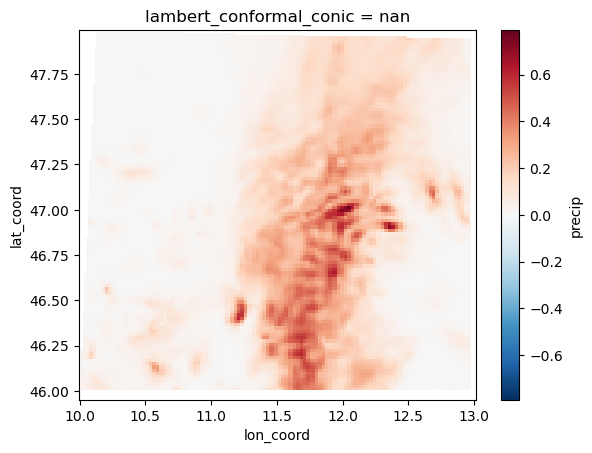

In [72]:
precip_diff.plot()